In [1]:
pip install numpy pandas sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
#Citiți datele
#Read the data
df=pd.read_csv('news.csv')

In [27]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [28]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [29]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [30]:
#Inițializați un TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [31]:
#inițializează un PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#Prezice pe platourile de testare și calculeaza acurătețea
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


In [32]:
#construim matricea de confuzie
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[590,  48],
       [ 44, 585]], dtype=int64)

In [33]:
#Deci, cu acest model, avem 592 de adevăruri pozitive, 588 adevăruri negative, 46 de falsuri pozitive și 41 de falsuri  negative.

In [34]:
#Am învățat să detectăm știrile false cu Python. Am luat un set de date politice, am implementat un TfidfVectorizer, am inițializat un PassiveAggressiveClassifier și ne-am potrivit modelului nostru. Am ajuns să obținem o precizie de 93,13% în magnitudine.

In [35]:
from sklearn.base import BaseEstimator,TransformerMixin

In [36]:
class TextNormalizer(BaseEstimator,TransformerMixin):
    def fit(self,x, y=None):
        return self
    
    def transform(self,x, y=None):
        x_copy=x.copy()
        for i in range(len(x_copy)):
            x_copy[i]=x_copy[i].lower()
            x_copy[i]=x_copy[i].replace('\n',' ')
            x_copy[i]=x_copy[i].replace('\r',' ')
            x_copy[i]=x_copy[i].strip()
        return x_copy

In [37]:
x=df['text'].values
y=df['label'].values

In [38]:
x

array(['Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that th

In [39]:
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [40]:
class WordExtractor (BaseEstimator,TransformerMixin):
    def __init__(self,language,tokenize):
        self.language=language
        self.stopwords=stopwords.words(self.language)
        self.tokenize=tokenize
        
    def fit(self,x, y=None):
                general_freq=FreqDist()
                for txt in x:
                    freq_dist=FreqDist(self.tokenize(txt))
                    general_freq.update(freq_dist)
                self.hapaxes=general_freq.hapaxes()
                return self
                
    def  transform(self,x, y=None):
        x_copy=x.copy()
        for i in range(len(x_copy)):
            x_copy[i]=' '.join([token for token in self.tokenize(x_copy[i])
                               if token not in self.stopwords and
                               token not in self.hapaxes])
            return x_copy

In [41]:
class ApplyStemmer(BaseEstimator,TransformerMixin):
    def __init__(self,stemmer,tokenize):
        self.stemmer=stemmer
        self.tokenize=tokenize
        
    def fit(self,x, y=None):
            return self
        
    def transform(self,x, y=None):
        x_copy=x.copy()
        for i in range(len(x_copy)):
            x_copy[i]=' '.join([self.stemmer.stem(token)
                               for token in self.tokenize(x_copy[i])])
        return x_copy

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [43]:
pipe=Pipeline([
        ('Normalization',TextNormalizer()),
        ('Word Extraction', WordExtractor('english', word_tokenize)),
        ('Apply Stemmer',ApplyStemmer(PorterStemmer(),word_tokenize)),
       ('Vectorization',CountVectorizer()),
 ('Model',LogisticRegression())
])

In [44]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42)

In [46]:
pipe.fit(x_train, y_train)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('Normalization', TextNormalizer()),
                ('Word Extraction',
                 WordExtractor(language='english',
                               tokenize=<function word_tokenize at 0x000001C3DBAD0F78>)),
                ('Apply Stemmer',
                 ApplyStemmer(stemmer=<PorterStemmer>,
                              tokenize=<function word_tokenize at 0x000001C3DBAD0F78>)),
                ('Vectorization', CountVectorizer()),
                ('Model', LogisticRegression())])

In [49]:
y_pred=pipe.predict(x_test)

In [50]:
y_pred

array(['FAKE', 'FAKE', 'FAKE', ..., 'FAKE', 'REAL', 'FAKE'], dtype=object)

In [51]:
accuracy_score(y_pred,y_test)

0.9185606060606061

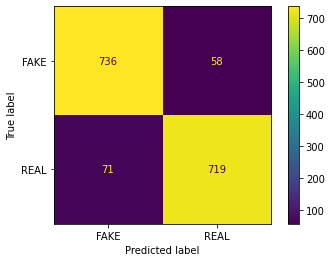

In [52]:
plot_confusion_matrix(pipe,x_test,y_test)

In [53]:
import pickle

In [54]:
pickle.dump(pipe,open('pipe.pkl','wb'))